In [3]:
import pandas as pd
from tsl.datasets import AirQuality, MetrLA, PemsBay
from sklearn.model_selection import train_test_split
from Metrics import evaluate_datasets

Generated_path = '/Users/paulmagos/Documents/TSGen/Datasets/GeneratedDatasets/MetrLA/'
TeachForcing_path = '/Users/paulmagos/Documents/TSGen/Datasets/TeachForcingDatasets/'

In [4]:
df_MetrLA = MetrLA()
df_MetrLA = df_MetrLA.dataframe()[-800:].reset_index(drop=True)
df_MetrLA['gen'] = 1
df_MetrLA.columns = df_MetrLA.columns.droplevel('channels')

In [5]:
syn_MetrLA_dopple = pd.read_csv(f'{Generated_path}synteticMetrLADoppleGANger.csv')
syn_MetrLA_dopple.columns = [col.split(",")[0].replace("(", "").replace("'", "") if col != 'gen' else col for col in syn_MetrLA_dopple.columns]

syn_MetrLA_GTM = pd.read_csv(f'{Generated_path}synteticMetrLAGTM.csv')
syn_MetrLA_GTLSTM = pd.read_csv(f'{Generated_path}synteticMetrLAGTLSTM.csv')
syn_MetrLA_GRGN = pd.read_csv(f'{Generated_path}SynteticMetrLAGRGNTanh.csv')
syn_MetrLA_PAR = pd.read_csv(f'{Generated_path}synteticMetrLAPAR.csv')

syn_MetrLA_dopple['gen'] = 0
syn_MetrLA_GTM['gen'] = 0
syn_MetrLA_GTLSTM['gen'] = 0
syn_MetrLA_GRGN['gen'] = 0
syn_MetrLA_PAR['gen'] = 0

In [6]:
results_df = pd.DataFrame(columns=['dataset', 'model', 'mean_difference',
 'variance_difference',
 'skewness_difference',
 'kurtosis_difference',
 'ks_test',
 'ks_test_p_value',
 'wasserstein_distance',
 'js_divergence',
 'correlation_difference',
 'mmd_linear',
 'mmd_rbf',
 'model_accuracy',
 'model_accuracy_on_Gen',
 'model_accuracy_train_on_both',
 'model_accuracy_train_on_both_Gen'])

In [7]:
df_MetrLA.columns = [str(col) for col in df_MetrLA.columns]
syn_MetrLA_GTM.columns = [str(col) for col in syn_MetrLA_GTM.columns]
syn_MetrLA_dopple.columns = [str(col) for col in syn_MetrLA_dopple.columns]
syn_MetrLA_GTLSTM.columns = [str(col) for col in syn_MetrLA_GTLSTM.columns]
syn_MetrLA_GRGN.columns = [str(col) for col in syn_MetrLA_GRGN.columns]
syn_MetrLA_PAR.columns = [str(col) for col in syn_MetrLA_PAR.columns]

In [8]:
out = evaluate_datasets(df_MetrLA, syn_MetrLA_dopple, 'gen')
out['dataset'] = "MetrLA"
out['model'] = "DoppleGANger"
res = pd.DataFrame(out, ["MetrLA DoppleGANger"])
results_df = pd.concat([results_df, res], ignore_index = True)

/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: divide by zero encountered in log
  kl_div = split_preds * np.log(split_preds / marginal)
/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: invalid value encountered in multiply
  kl_div = split_preds * np.log(split_preds / marginal)


In [9]:
out = evaluate_datasets(df_MetrLA, syn_MetrLA_PAR, 'gen')
out['dataset'] = "MetrLA"
out['model'] = "PAR"
res = pd.DataFrame(out, ["MetrLA PAR"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [10]:
out = evaluate_datasets(df_MetrLA, syn_MetrLA_GTM, 'gen')
out['dataset'] = "MetrLA"
out['model'] = "GTM"
res = pd.DataFrame(out, ["MetrLA GTM"])
results_df = pd.concat([results_df, res], ignore_index = True)

/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: divide by zero encountered in log
  kl_div = split_preds * np.log(split_preds / marginal)
/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: invalid value encountered in multiply
  kl_div = split_preds * np.log(split_preds / marginal)


In [11]:
out = evaluate_datasets(df_MetrLA, syn_MetrLA_GTLSTM, 'gen')
out['dataset'] = "MetrLA"
out['model'] = "GTLSTM"
res = pd.DataFrame(out, ["MetrLA GTLSTM"])
results_df = pd.concat([results_df, res], ignore_index = True)

/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: divide by zero encountered in log
  kl_div = split_preds * np.log(split_preds / marginal)
/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: invalid value encountered in multiply
  kl_div = split_preds * np.log(split_preds / marginal)


In [12]:
out = evaluate_datasets(df_MetrLA, syn_MetrLA_GRGN, 'gen')
out['dataset'] = "MetrLA"
out['model'] = "GRGN"
res = pd.DataFrame(out, ["MetrLA GRGN"])
results_df = pd.concat([results_df, res], ignore_index = True)

/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: divide by zero encountered in log
  kl_div = split_preds * np.log(split_preds / marginal)
/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: invalid value encountered in multiply
  kl_div = split_preds * np.log(split_preds / marginal)


In [13]:
results_df['tmp'] = (results_df['inception_score_mean'] - results_df['inception_score_std']).abs()


In [14]:
results_df_MetrLA = results_df[results_df['dataset'] == 'MetrLA'].sort_values(by=['tmp'], ascending=False).reset_index(drop=True)
results_df_MetrLA

,dataset,model,mean_difference,variance_difference,skewness_difference,kurtosis_difference,ks_test,ks_test_p_value,wasserstein_distance,js_divergence,...,model_accuracy_on_Gen,model_accuracy_train_on_both,model_accuracy_train_on_both_Gen,correlation_gen,correlation_original,inception_score_mean,inception_score_std,t_stat,t_stat_p_value,tmp
0,MetrLA,PAR,1.013949,107.569129,2.103826,6.758911,0.426937,9.694359e-24,5.247058,0.677217,...,0.0,1.0,1.000000,0.004783,0.138524,1.953926,0.011927,-2.171499,1.458547e-01,1.941999
1,MetrLA,GTM,8.758358,660.164479,2.061638,7.416299,0.422843,9.798577e-20,15.222392,0.692070,...,0.0,1.0,0.999001,0.006514,0.138524,1.778461,0.593084,0.603298,3.325702e-02,1.185377
2,MetrLA,GTLSTM,3.107205,138.180371,25.854729,760.041834,0.691716,4.543897e-103,8.028513,0.778660,...,0.0,1.0,0.999001,0.169872,0.138524,0.586836,0.896444,-2.939096,6.058474e-02,0.309608
3,MetrLA,DoppleGANger,22.080094,173.131244,3.504574,9.032888,0.886564,6.616242e-177,22.374452,0.693183,...,0.0,1.0,1.000000,0.547329,0.138524,0.000000,0.000000,-31.406768,2.150362e-70,0.000000
4,MetrLA,GRGN,4.679844,158.980115,2.099073,7.694664,0.526831,8.018673e-11,8.005799,0.628571,...,0.0,1.0,1.000000,0.004702,0.138524,0.000000,0.000000,1.321817,3.128665e-02,0.000000


In [15]:
results_df = results_df.sort_values(by=['correlation_gen'], ascending=True).reset_index(drop=True)
results_df

,dataset,model,mean_difference,variance_difference,skewness_difference,kurtosis_difference,ks_test,ks_test_p_value,wasserstein_distance,js_divergence,...,model_accuracy_on_Gen,model_accuracy_train_on_both,model_accuracy_train_on_both_Gen,correlation_gen,correlation_original,inception_score_mean,inception_score_std,t_stat,t_stat_p_value,tmp
0,MetrLA,GRGN,4.679844,158.980115,2.099073,7.694664,0.526831,8.018673e-11,8.005799,0.628571,...,0.0,1.0,1.000000,0.004702,0.138524,0.000000,0.000000,1.321817,3.128665e-02,0.000000
1,MetrLA,PAR,1.013949,107.569129,2.103826,6.758911,0.426937,9.694359e-24,5.247058,0.677217,...,0.0,1.0,1.000000,0.004783,0.138524,1.953926,0.011927,-2.171499,1.458547e-01,1.941999
2,MetrLA,GTM,8.758358,660.164479,2.061638,7.416299,0.422843,9.798577e-20,15.222392,0.692070,...,0.0,1.0,0.999001,0.006514,0.138524,1.778461,0.593084,0.603298,3.325702e-02,1.185377
3,MetrLA,GTLSTM,3.107205,138.180371,25.854729,760.041834,0.691716,4.543897e-103,8.028513,0.778660,...,0.0,1.0,0.999001,0.169872,0.138524,0.586836,0.896444,-2.939096,6.058474e-02,0.309608
4,MetrLA,DoppleGANger,22.080094,173.131244,3.504574,9.032888,0.886564,6.616242e-177,22.374452,0.693183,...,0.0,1.0,1.000000,0.547329,0.138524,0.000000,0.000000,-31.406768,2.150362e-70,0.000000


In [16]:
df = results_df

# Filter for models that contain "GRGN" in the dataset
# grgn_models = df[df['dataset'].str.contains("GRGN")]
grgn_models = results_df
# Metrics to focus on
metrics_to_compare = ['mean_difference', 'variance_difference', 'ks_test', 'wasserstein_distance', 
                      'js_divergence', 'correlation_difference', 'model_accuracy', 'inception_score_mean']

# Find the minimum for distance-based metrics and the maximum for accuracy/inception-based metrics
best_grgn_models = grgn_models.loc[:, ['dataset', 'model'] + metrics_to_compare].copy()

# For distance-based metrics, lower is better, so we will look for the minimum values.
# For accuracy-based and inception score-based metrics, higher is better.

# Normalize each metric: for distance-based (lower is better), for accuracy-based (higher is better)
for col in ['mean_difference', 'variance_difference', 'ks_test', 'wasserstein_distance', 
            'js_divergence', 'correlation_difference']:
    best_grgn_models[col + '_rank'] = best_grgn_models[col].rank(ascending=True)

# For accuracy and inception score, higher is better
for col in ['model_accuracy', 'inception_score_mean']:
    best_grgn_models[col + '_rank'] = best_grgn_models[col].rank(ascending=False)

# Calculate total rank
best_grgn_models['total_rank'] = best_grgn_models[[col + '_rank' for col in metrics_to_compare]].sum(axis=1)

# Sort by total rank to find the best overall GRGN model
best_grgn_models = best_grgn_models.sort_values('total_rank').reset_index(drop=True)

# Display the best GRGN model
best_grgn_models


,dataset,model,mean_difference,variance_difference,ks_test,wasserstein_distance,js_divergence,correlation_difference,model_accuracy,inception_score_mean,mean_difference_rank,variance_difference_rank,ks_test_rank,wasserstein_distance_rank,js_divergence_rank,correlation_difference_rank,model_accuracy_rank,inception_score_mean_rank,total_rank
0,MetrLA,PAR,1.013949,107.569129,0.426937,5.247058,0.677217,0.229995,0.0,1.953926,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,13.0
1,MetrLA,GRGN,4.679844,158.980115,0.526831,8.005799,0.628571,0.229579,0.0,0.000000,3.0,3.0,3.0,2.0,1.0,1.0,3.0,4.5,20.5
2,MetrLA,GTM,8.758358,660.164479,0.422843,15.222392,0.692070,0.231443,0.0,1.778461,4.0,5.0,1.0,4.0,3.0,3.0,3.0,2.0,25.0
3,MetrLA,GTLSTM,3.107205,138.180371,0.691716,8.028513,0.778660,0.727783,0.0,0.586836,2.0,2.0,4.0,3.0,5.0,5.0,3.0,3.0,27.0
4,MetrLA,DoppleGANger,22.080094,173.131244,0.886564,22.374452,0.693183,0.437032,0.0,0.000000,5.0,4.0,5.0,5.0,4.0,4.0,3.0,4.5,34.5


In [17]:
best_grgn_models[best_grgn_models['dataset']=='MetrLA']

,dataset,model,mean_difference,variance_difference,ks_test,wasserstein_distance,js_divergence,correlation_difference,model_accuracy,inception_score_mean,mean_difference_rank,variance_difference_rank,ks_test_rank,wasserstein_distance_rank,js_divergence_rank,correlation_difference_rank,model_accuracy_rank,inception_score_mean_rank,total_rank
0,MetrLA,PAR,1.013949,107.569129,0.426937,5.247058,0.677217,0.229995,0.0,1.953926,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,13.0
1,MetrLA,GRGN,4.679844,158.980115,0.526831,8.005799,0.628571,0.229579,0.0,0.000000,3.0,3.0,3.0,2.0,1.0,1.0,3.0,4.5,20.5
2,MetrLA,GTM,8.758358,660.164479,0.422843,15.222392,0.692070,0.231443,0.0,1.778461,4.0,5.0,1.0,4.0,3.0,3.0,3.0,2.0,25.0
3,MetrLA,GTLSTM,3.107205,138.180371,0.691716,8.028513,0.778660,0.727783,0.0,0.586836,2.0,2.0,4.0,3.0,5.0,5.0,3.0,3.0,27.0
4,MetrLA,DoppleGANger,22.080094,173.131244,0.886564,22.374452,0.693183,0.437032,0.0,0.000000,5.0,4.0,5.0,5.0,4.0,4.0,3.0,4.5,34.5


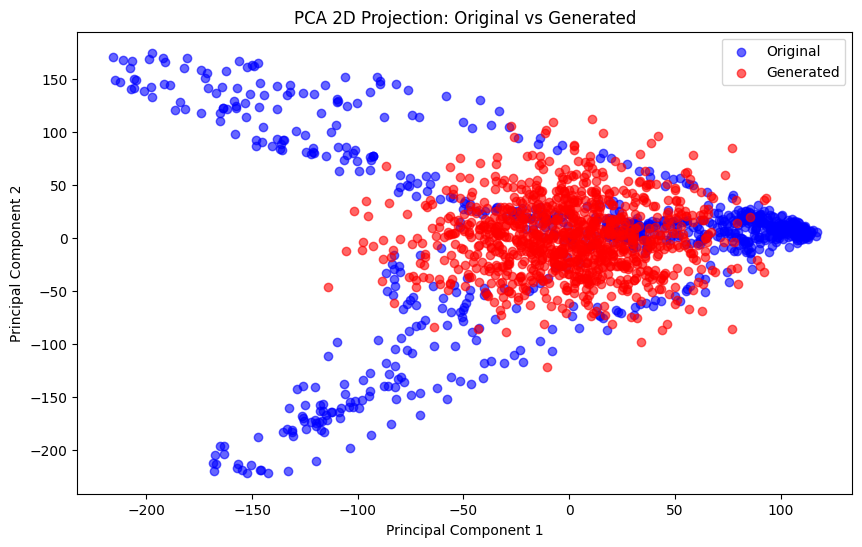

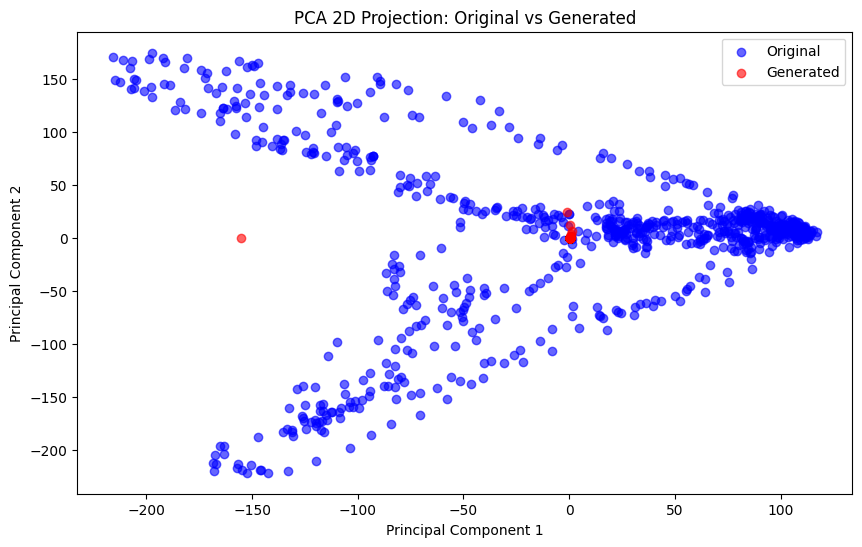

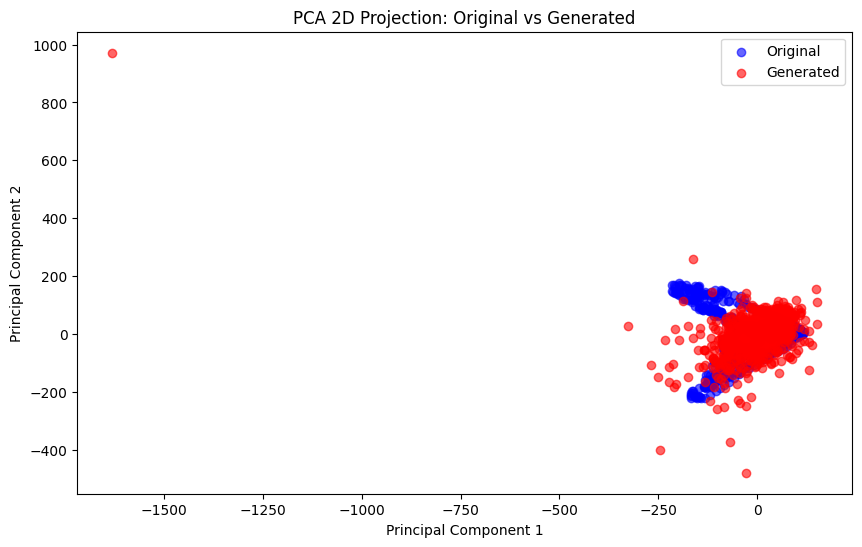

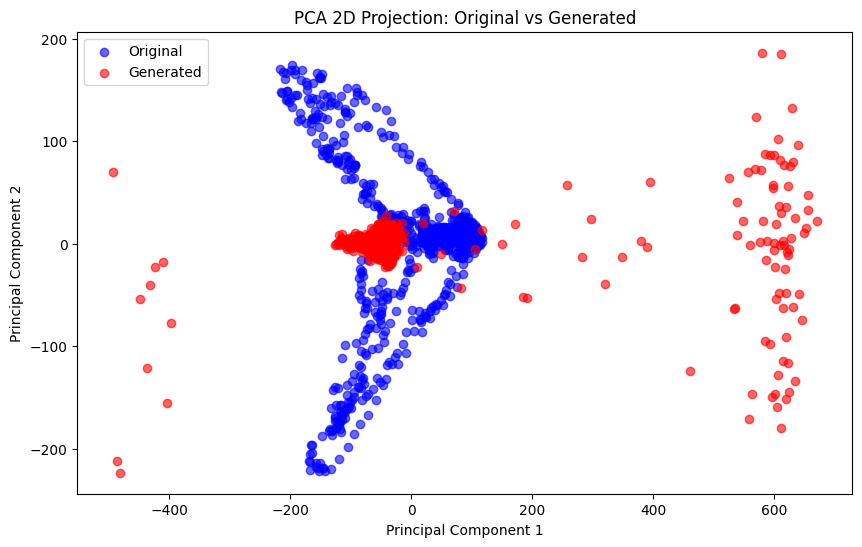

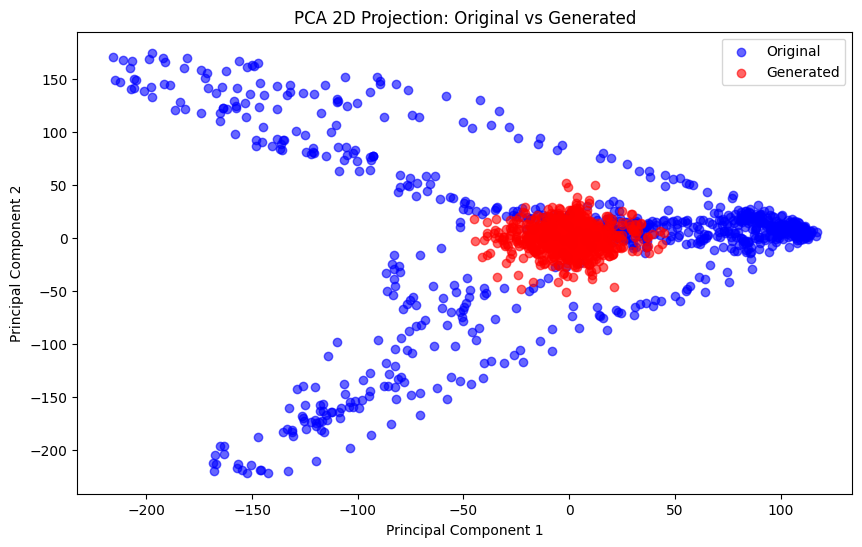

In [18]:
from VisualEval import plot_pca

plot_pca(df_MetrLA, syn_MetrLA_GRGN)
plot_pca(df_MetrLA, syn_MetrLA_GTLSTM)
plot_pca(df_MetrLA, syn_MetrLA_GTM)
plot_pca(df_MetrLA, syn_MetrLA_dopple)
plot_pca(df_MetrLA, syn_MetrLA_PAR)

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


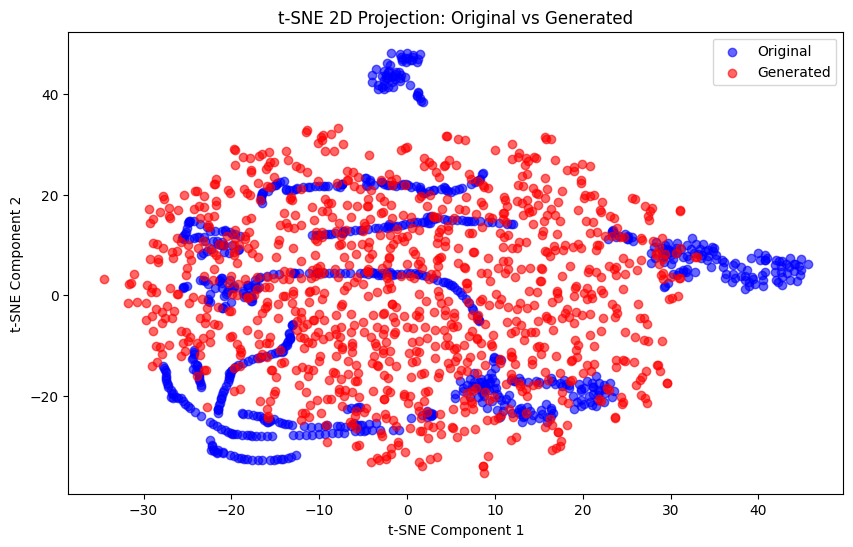

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


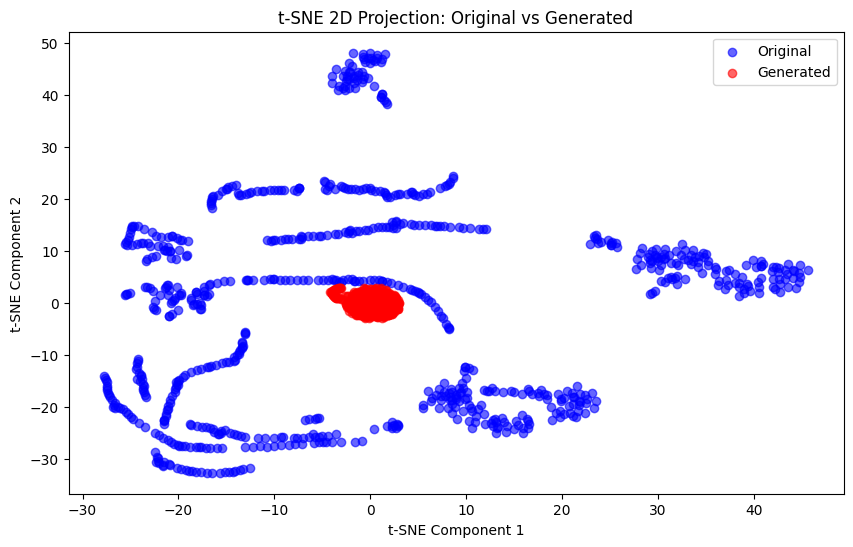

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


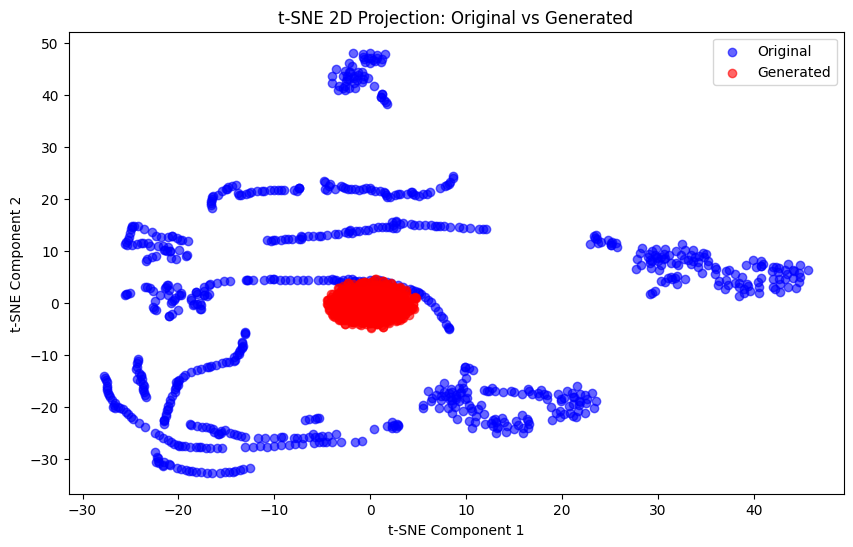

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


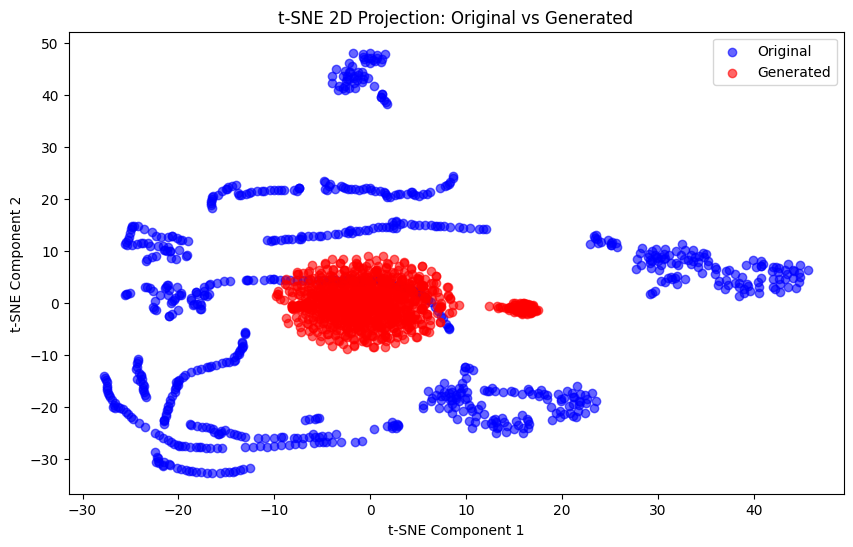

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


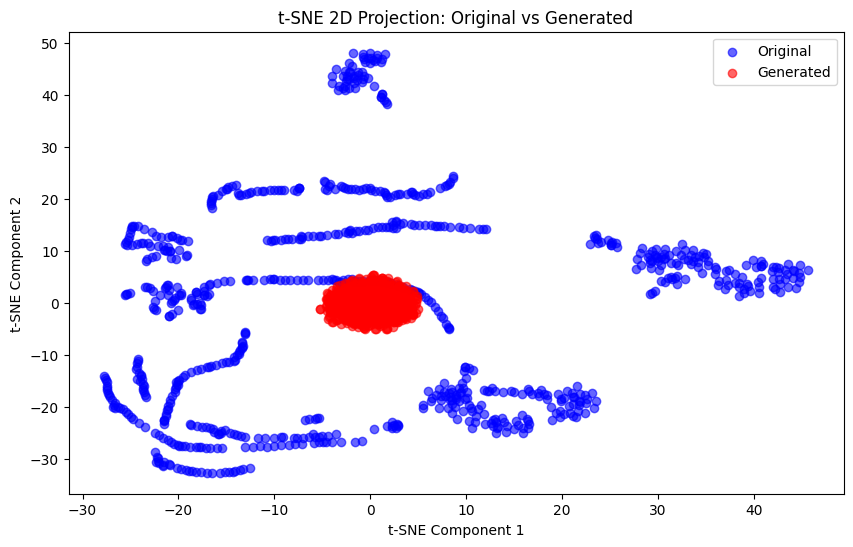

In [19]:
from VisualEval import plot_tsne

plot_tsne(df_MetrLA, syn_MetrLA_GRGN)
plot_tsne(df_MetrLA, syn_MetrLA_GTLSTM)
plot_tsne(df_MetrLA, syn_MetrLA_GTM)
plot_tsne(df_MetrLA, syn_MetrLA_dopple)
plot_tsne(df_MetrLA, syn_MetrLA_PAR)

In [26]:
df_MetrLA

,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,769372,774204,769806,717590,717592,717595,772168,718141,769373,gen
0,64.333336,63.222221,68.000000,55.777779,67.444443,65.555557,65.000000,66.666664,61.333332,68.500000,...,65.222221,58.111111,65.777779,64.111115,59.666668,65.000000,66.000000,67.000000,65.000000,1
1,63.500000,63.125000,68.375000,58.875000,66.875000,63.875000,67.375000,64.000000,60.750000,68.125000,...,65.250000,64.625000,60.666668,63.750000,62.500000,63.750000,64.875000,62.250000,64.500000,1
2,62.125000,60.625000,68.250000,54.250000,64.250000,64.875000,64.875000,63.375000,61.875000,66.625000,...,67.000000,62.375000,66.375000,62.375000,62.875000,67.375000,62.000000,65.000000,65.428574,1
3,65.333336,65.666664,68.444443,58.333332,65.666664,65.777779,66.666664,66.555557,58.777779,66.000000,...,67.000000,57.888889,67.222221,64.555557,60.444443,65.222221,64.777779,66.000000,66.333336,1
4,64.500000,63.750000,60.000000,56.250000,67.875000,65.000000,67.875000,65.625000,60.125000,65.750000,...,66.714287,62.000000,66.750000,66.500000,60.500000,64.125000,64.500000,63.125000,65.142860,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,65.000000,65.888885,68.555557,61.666668,32.833332,54.555557,62.444443,63.333332,59.222221,65.333336,...,69.000000,65.111115,55.666668,66.333336,62.444443,66.777779,64.888885,69.666664,62.333332,1
796,61.375000,65.625000,66.500000,62.750000,32.833332,50.500000,62.000000,67.000000,65.250000,67.125000,...,69.250000,60.125000,60.500000,67.250000,59.375000,66.000000,61.250000,69.000000,62.000000,1
797,67.000000,59.666668,69.555557,61.000000,32.833332,44.777779,64.222221,63.777779,59.777779,57.666668,...,67.888885,64.333336,57.000000,66.000000,62.666668,68.666664,63.333332,67.444443,61.222221,1
798,66.750000,62.250000,66.000000,59.625000,32.833332,53.000000,64.285713,64.125000,60.875000,66.250000,...,69.375000,61.625000,60.500000,65.625000,66.375000,69.500000,63.000000,67.875000,63.500000,1


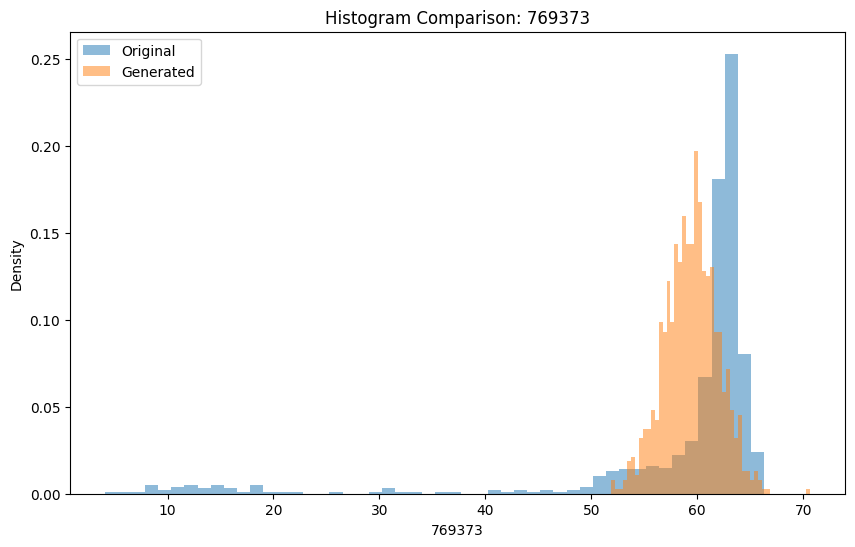

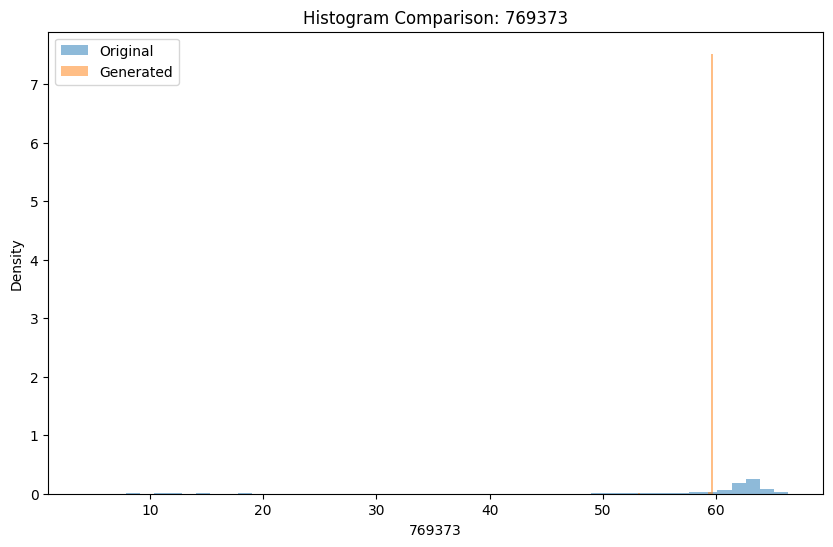

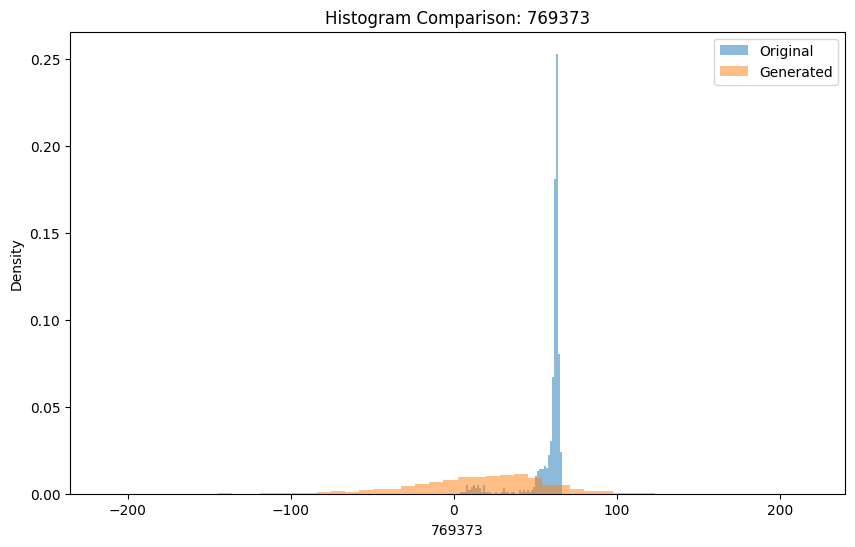

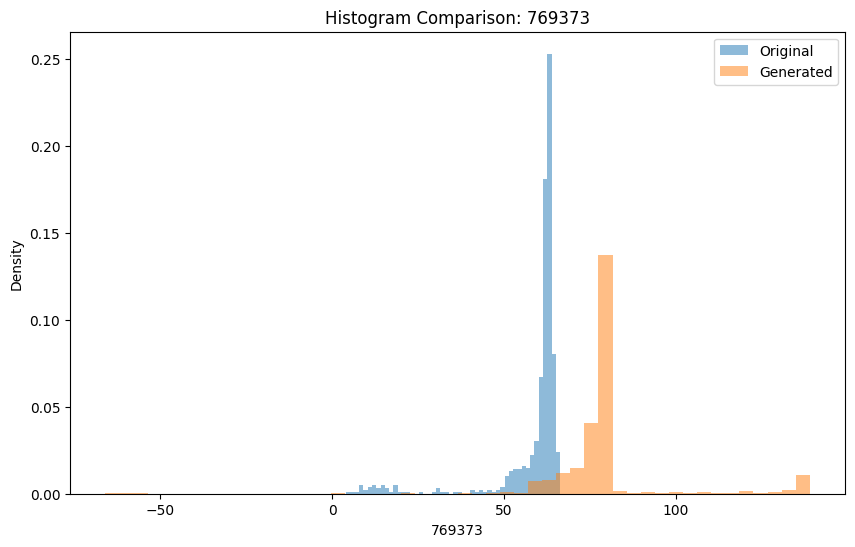

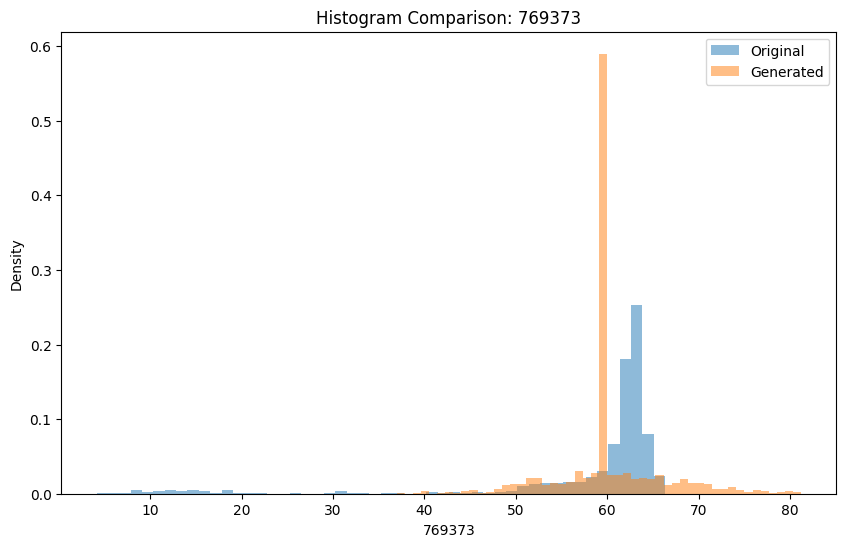

In [35]:
from VisualEval import plot_histograms

plot_histograms(df_MetrLA, syn_MetrLA_GRGN, '769373')
plot_histograms(df_MetrLA, syn_MetrLA_GTLSTM, '769373')
plot_histograms(df_MetrLA, syn_MetrLA_GTM, '769373')
plot_histograms(df_MetrLA, syn_MetrLA_dopple, '769373')
plot_histograms(df_MetrLA, syn_MetrLA_PAR, '769373')

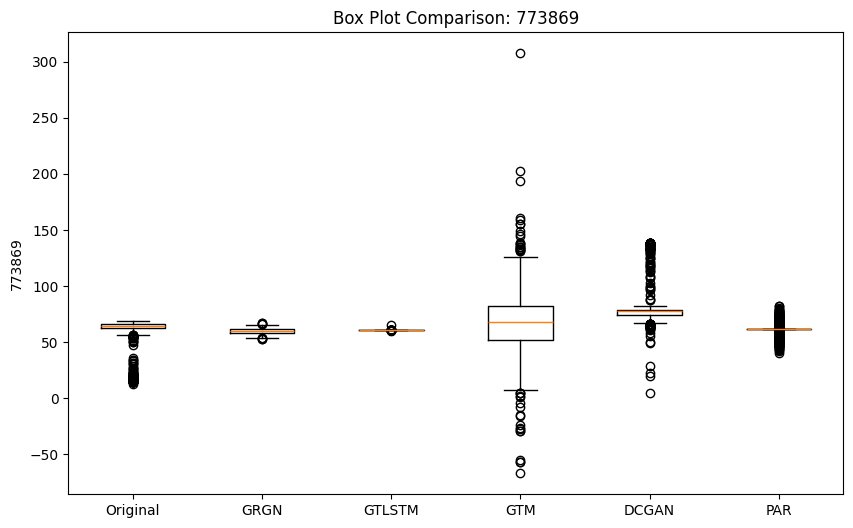

In [36]:
from VisualEval import plot_boxplots_many, plot_boxplots_means, plot_histograms_means

plot_boxplots_many('773869', ('Original', df_MetrLA), 
                   ('GRGN', syn_MetrLA_GRGN), 
                   ('GTLSTM', syn_MetrLA_GTLSTM), 
                   ('GTM', syn_MetrLA_GTM), 
                   ('DCGAN', syn_MetrLA_dopple), 
                   ('PAR', syn_MetrLA_PAR))

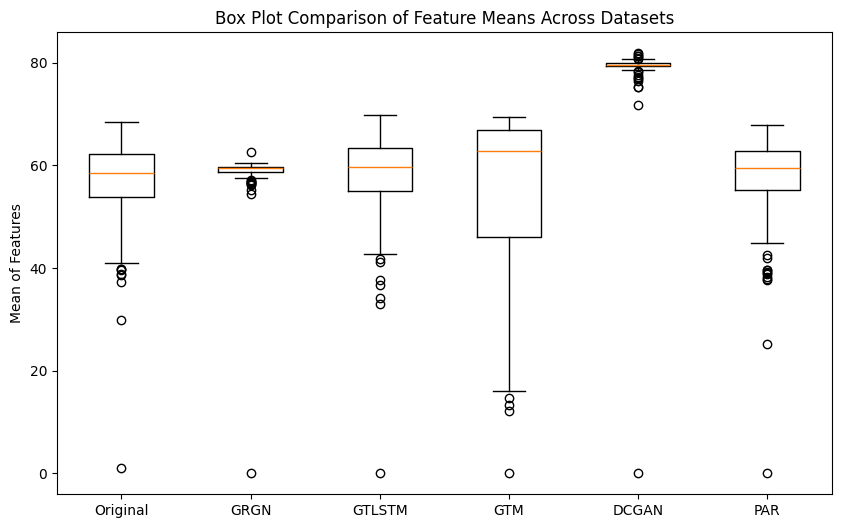

In [37]:
plot_boxplots_means(('Original', df_MetrLA), 
                   ('GRGN', syn_MetrLA_GRGN), 
                   ('GTLSTM', syn_MetrLA_GTLSTM), 
                   ('GTM', syn_MetrLA_GTM), 
                   ('DCGAN', syn_MetrLA_dopple), 
                   ('PAR', syn_MetrLA_PAR))

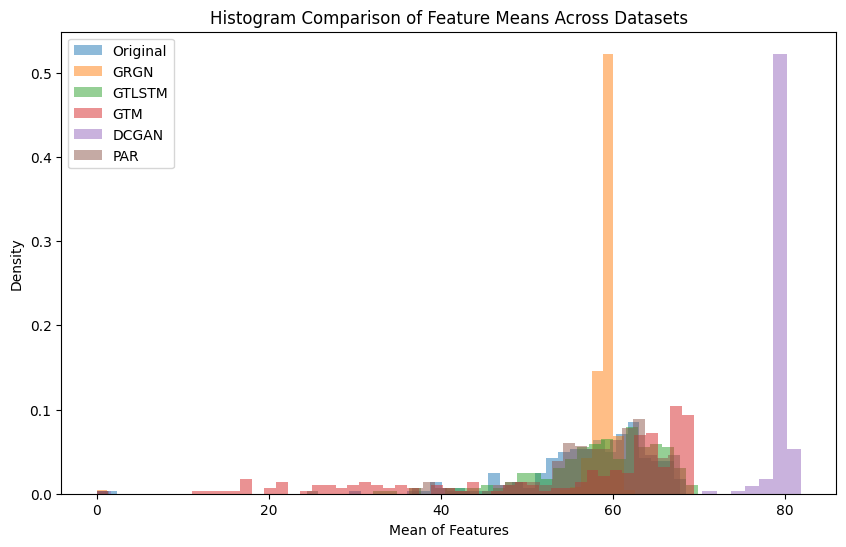

In [38]:
plot_histograms_means(('Original', df_MetrLA), 
                   ('GRGN', syn_MetrLA_GRGN), 
                   ('GTLSTM', syn_MetrLA_GTLSTM), 
                   ('GTM', syn_MetrLA_GTM), 
                   ('DCGAN', syn_MetrLA_dopple), 
                   ('PAR', syn_MetrLA_PAR))